In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gan = np.load('../../experiments/runs/POS_run_Feb272020_rayBest/train_mse.npy')
l2 = np.load('../../experiments/runs/POS_run_Feb272020_L2Compare/train_mse.npy')
l1 = np.load('../../experiments/runs/POS_run_Feb272020_L1Compare/train_mse.npy')
huber = np.load('../../experiments/runs/POS_run_Feb272020_SmoothL1Compare/train_mse.npy')

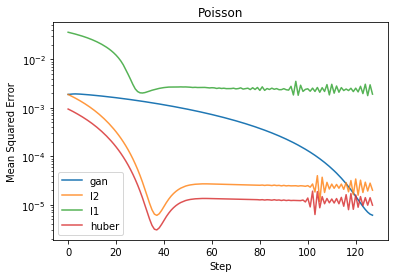

In [3]:
steps = np.arange(len(gan))
plt.plot(steps, gan, label='gan')
plt.plot(steps, l2, label='l2', alpha=0.8)
plt.plot(steps, l1, label='l1', alpha=0.8)
plt.plot(steps, huber, label='huber', alpha=0.8)
plt.legend()
plt.yscale('log')
plt.title('Poisson')
plt.xlabel('Step')
plt.ylabel('Mean Squared Error');

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
tpi = torch.tensor(np.pi)

In [3]:
def anal_sol(x, y):
    return torch.sin(tpi*y) * torch.sinh(tpi*(1-x)) / torch.sinh(tpi)

In [4]:
x = torch.linspace(0, 1, 32)
y = torch.linspace(0, 1, 32)
xx, yy = torch.meshgrid(x, y)

In [5]:
xx

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0323, 0.0323, 0.0323,  ..., 0.0323, 0.0323, 0.0323],
        [0.0645, 0.0645, 0.0645,  ..., 0.0645, 0.0645, 0.0645],
        ...,
        [0.9355, 0.9355, 0.9355,  ..., 0.9355, 0.9355, 0.9355],
        [0.9677, 0.9677, 0.9677,  ..., 0.9677, 0.9677, 0.9677],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]])

In [6]:
x = xx.flatten()
y = yy.flatten()

In [32]:
grid = torch.cat((x.reshape(-1,1), y.reshape(-1,1)), axis=0)

In [7]:
anal = anal_sol(x, y)

In [8]:
anal.shape

torch.Size([1024])

In [9]:
x.shape, y.shape

(torch.Size([1024]), torch.Size([1024]))

In [10]:
xx.shape

torch.Size([32, 32])

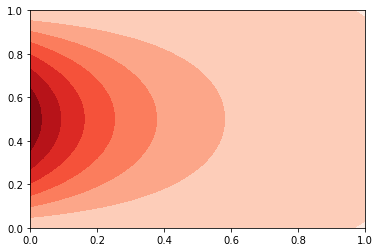

In [13]:
plt.contourf(xx, yy, anal.reshape(32,32), cmap="Reds")

In [14]:
topdir = "/Users/dylanrandle/Documents/Harvard/research/denn/experiments/runs/POS_run_test/"

In [15]:
uhat = np.load(topdir+"$\hat{u}$_pred.npy")

In [16]:
uhat.shape

(1024, 1)

In [17]:
grid = np.load(topdir+"grid.npy")

In [18]:
grid.shape

(1024, 2)

In [19]:
sol = np.load(topdir+"$u$_pred.npy")

In [20]:
uhat = uhat.reshape(32,32)

In [21]:
sol = sol.reshape(32,32)

In [22]:
np.mean((uhat - sol.T)**2)

0.09859729

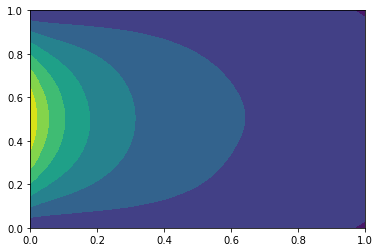

In [23]:
plt.contourf(xx, yy, uhat)

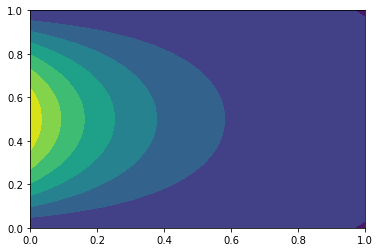

In [24]:
plt.contourf(xx, yy, sol)

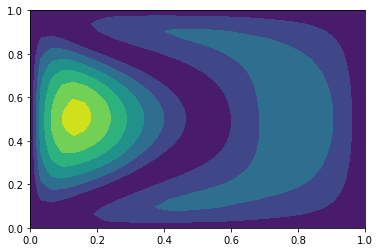

In [25]:
plt.contourf(xx, yy, np.abs(sol-uhat))

In [231]:
uhat[0, :]

array([ 0.0000000e+00,  1.0116832e-01,  2.0129852e-01,  2.9936311e-01,
        3.9435583e-01,  4.8530197e-01,  5.7126820e-01,  6.5137249e-01,
        7.2479278e-01,  7.9077572e-01,  8.4864426e-01,  8.9780456e-01,
        9.3775213e-01,  9.6807712e-01,  9.8846835e-01,  9.9871647e-01,
        9.9871647e-01,  9.8846835e-01,  9.6807712e-01,  9.3775207e-01,
        8.9780450e-01,  8.4864432e-01,  7.9077566e-01,  7.2479272e-01,
        6.5137255e-01,  5.7126826e-01,  4.8530200e-01,  3.9435586e-01,
        2.9936311e-01,  2.0129871e-01,  1.0116826e-01, -8.7422777e-08],
      dtype=float32)

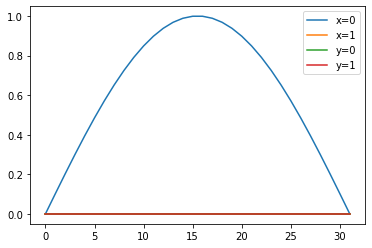

In [232]:
plt.plot(uhat[0,:], label='x=0')
plt.plot(uhat[-1,:], label='x=1')
plt.plot(uhat[:,0], label='y=0')
plt.plot(uhat[:,-1], label='y=1')
plt.legend()
# plt.yscale('log')

In [233]:
uhat[-1, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [234]:
uhat[:, -1]

array([-8.7422777e-08, -8.4602689e-08, -8.1782595e-08, -7.8962508e-08,
       -7.6142420e-08, -7.3322333e-08, -7.0502239e-08, -6.7682144e-08,
       -6.4862064e-08, -6.2041977e-08, -5.9221883e-08, -5.6401788e-08,
       -5.3581704e-08, -5.0761617e-08, -4.7941523e-08, -4.5121432e-08,
       -4.2301345e-08, -3.9481257e-08, -3.6661167e-08, -3.3841072e-08,
       -3.1020988e-08, -2.8200899e-08, -2.5380809e-08, -2.2560716e-08,
       -1.9740629e-08, -1.6920541e-08, -1.4100450e-08, -1.1280358e-08,
       -8.4602707e-09, -5.6401843e-09, -2.8200922e-09,  0.0000000e+00],
      dtype=float32)

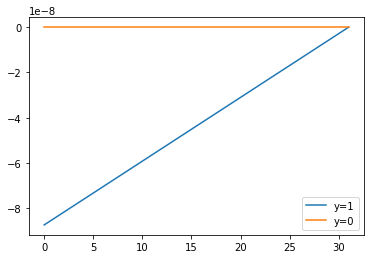

In [235]:
plt.plot(uhat[:,-1], label='y=1')
plt.plot(uhat[:,0], label='y=0')
plt.legend()

In [236]:
uhat[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)